In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Assessment/Electric_Vehicle_Population_Data.csv")

# Preview the dataset
print("Dataset Preview:")
print(data.head())

# Display dataset information
print("\nDataset Information:")
print(data.info())

# Display basic statistics of the dataset
print("\nDataset Statistics:")
print(data.describe())

Dataset Preview:
   VIN (1-10)     County     City State  Postal Code  Model Year    Make  \
0  3C3CFFGE4E     Yakima   Yakima    WA      98902.0        2014    FIAT   
1  5YJXCBE40H   Thurston  Olympia    WA      98513.0        2017   TESLA   
2  3MW39FS03P       King   Renton    WA      98058.0        2023     BMW   
3  7PDSGABA8P  Snohomish  Bothell    WA      98012.0        2023  RIVIAN   
4  5YJ3E1EB8L       King     Kent    WA      98031.0        2020   TESLA   

     Model                   Electric Vehicle Type  \
0      500          Battery Electric Vehicle (BEV)   
1  MODEL X          Battery Electric Vehicle (BEV)   
2     330E  Plug-in Hybrid Electric Vehicle (PHEV)   
3      R1S          Battery Electric Vehicle (BEV)   
4  MODEL 3          Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible              87   
1            Clean Alternative Fuel Vehicle Eligible     

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Fill or drop missing values (example: using mean for numerical columns)
for column in data.select_dtypes(include=np.number).columns:
    if data[column].isnull().sum() > 0:
        data[column].fillna(data[column].mean(), inplace=True)

# Fill or drop missing categorical values (example: using mode)
for column in data.select_dtypes(include=['object']).columns:
    if data[column].isnull().sum() > 0:
        data[column].fillna(data[column].mode()[0], inplace=True)

print("\nMissing Values After Handling:")
print(data.isnull().sum())


Missing Values:
VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 360
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64


<ipython-input-9-1f145fbd7376>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)
<ipython-input-9-1f145fbd7376>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try


Missing Values After Handling:
VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


In [ ]:
# Remove duplicates if any
data.drop_duplicates(inplace=True)

# Standardize column names (optional but helpful for consistency)
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

print("\nData after basic cleaning:")
print(data.head())


Data after basic cleaning:
   vin_(1-10)     county     city state  postal_code  model_year    make  \
0  3C3CFFGE4E     Yakima   Yakima    WA      98902.0        2014    FIAT   
1  5YJXCBE40H   Thurston  Olympia    WA      98513.0        2017   TESLA   
2  3MW39FS03P       King   Renton    WA      98058.0        2023     BMW   
3  7PDSGABA8P  Snohomish  Bothell    WA      98012.0        2023  RIVIAN   
4  5YJ3E1EB8L       King     Kent    WA      98031.0        2020   TESLA   

     model                   electric_vehicle_type  \
0      500          Battery Electric Vehicle (BEV)   
1  MODEL X          Battery Electric Vehicle (BEV)   
2     330E  Plug-in Hybrid Electric Vehicle (PHEV)   
3      R1S          Battery Electric Vehicle (BEV)   
4  MODEL 3          Battery Electric Vehicle (BEV)   

   clean_alternative_fuel_vehicle_(cafv)_eligibility  electric_range  \
0            Clean Alternative Fuel Vehicle Eligible              87   
1            Clean Alternative Fuel Vehicle El

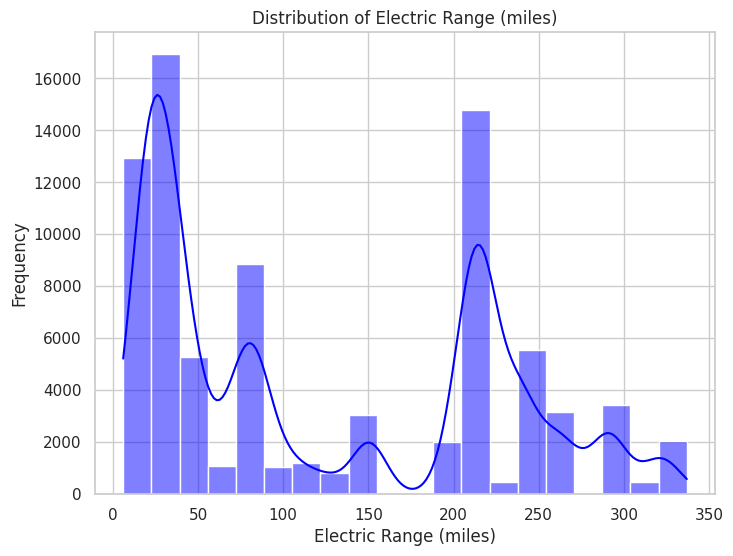

In [ ]:
# Distribution of the Dependent Variable
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(data['electric_range'], kde=True, bins=20, color='blue')
plt.title('Distribution of Electric Range (miles)')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')
plt.show()

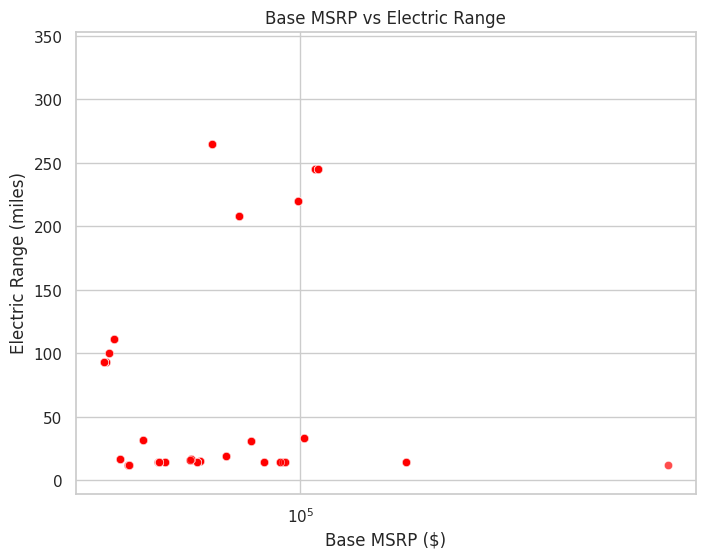

In [ ]:
# Scatter plot of Base MSRP vs Electric Range
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='base_msrp',
    y='electric_range',
    data=data,
    alpha=0.7, color='red'
)
plt.title('Base MSRP vs Electric Range')
plt.xlabel('Base MSRP ($)')
plt.ylabel('Electric Range (miles)')
plt.xscale('log')
plt.show()

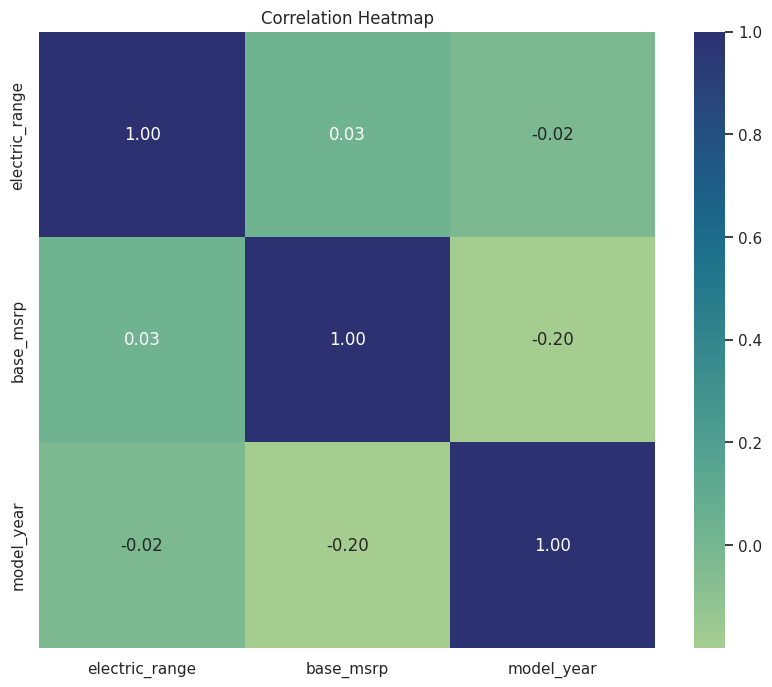

In [ ]:
# Correlation Heatmap of Relevant Variables
relevant_columns = [
    'electric_range',
    'base_msrp',
    'model_year'
]
plt.figure(figsize=(10, 8))
correlation_matrix = data[relevant_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()

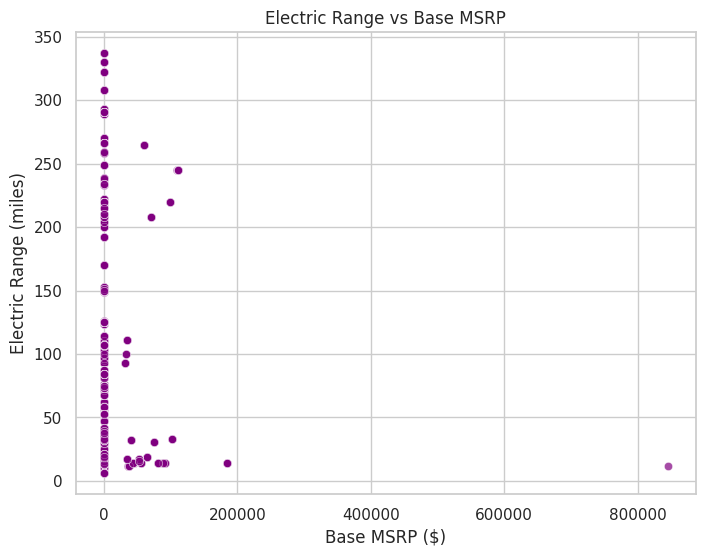

In [ ]:
# Scatter plot: Electric Range vs Base MSRP
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='base_msrp',
    y='electric_range',
    data=data,
    alpha=0.7, color='purple'
)
plt.title('Electric Range vs Base MSRP')
plt.xlabel('Base MSRP ($)')
plt.ylabel('Electric Range (miles)')
plt.show()

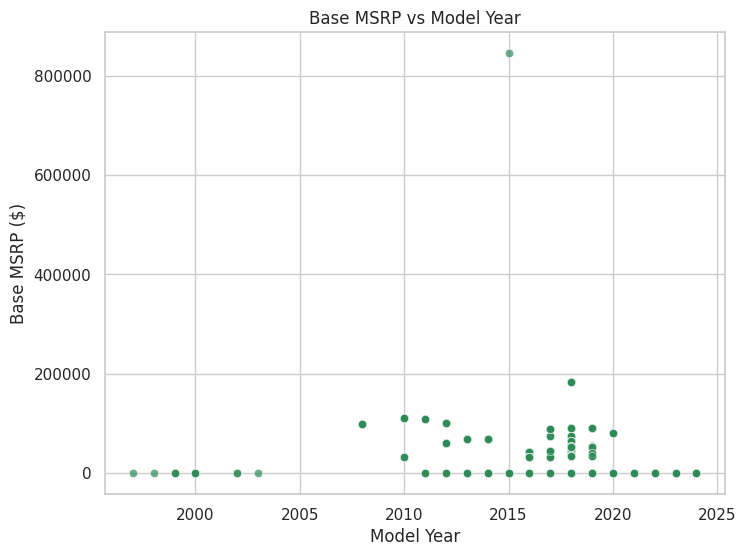

In [ ]:
# Scatter plot: Base MSRP vs Model Year
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='model_year',
    y='base_msrp',
    data=data,
    alpha=0.7, color='seagreen'
)
plt.title('Base MSRP vs Model Year')
plt.xlabel('Model Year')
plt.ylabel('Base MSRP ($)')
plt.show()

In [ ]:
# Extract relevant data
X = data[['base_msrp', 'model_year']].values
y = data['electric_range'].values

# Handle missing values (drop rows with NaN for simplicity)
mask = ~np.isnan(X).any(axis=1) & ~np.isnan(y)
X = X[mask]
y = y[mask]

# Normalize features for better optimization performance
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X = (X - X_mean) / X_std

# Add a bias term (intercept)
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Split the data into train and test sets (80% train, 20% test)
split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Initialize weights
weights = np.zeros(X_train.shape[1])

# Hyperparameters
learning_rate = 0.01
epochs = 1000

# Gradient Descent
for epoch in range(epochs):
    predictions = X_train.dot(weights)
    errors = predictions - y_train
    gradient = (1 / len(y_train)) * X_train.T.dot(errors)
    weights -= learning_rate * gradient

# Prediction function
def predict(X, weights):
    return X.dot(weights)

# Evaluate on the train and test sets
y_train_pred = predict(X_train, weights)
y_test_pred = predict(X_test, weights)

# Metrics
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r_squared(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r_squared(y_train, y_train_pred)
test_r2 = r_squared(y_test, y_test_pred)

# Print results
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train R-squared:", train_r2)
print("Test R-squared:", test_r2)

Train MSE: 9817.52036588293
Test MSE: 9809.510147432498
Train R-squared: 0.0012123777652730539
Test R-squared: -0.0010396906952863105


In [ ]:
from sklearn.linear_model import LinearRegression

# Model 1: Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_test_pred_linear = linear_model.predict(X_test)

print("Linear Regression model trained.")

Linear Regression model trained.


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Model 2: Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
y_test_pred_rf = random_forest_model.predict(X_test)

print("Random Forest Regressor model trained.")

Random Forest Regressor model trained.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluation Metrics
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Evaluate Model 1: Linear Regression
mae_linear, rmse_linear, r2_linear = evaluate_model(y_test, y_test_pred_linear)

# Evaluate Model 2: Random Forest Regressor
mae_rf, rmse_rf, r2_rf = evaluate_model(y_test, y_test_pred_rf)

# Print Results
print("Model 1: Linear Regression")
print(f"MAE: {mae_linear:.4f}, RMSE: {rmse_linear:.4f}, R-squared: {r2_linear:.4f}")

print("\nModel 2: Random Forest Regressor")
print(f"MAE: {mae_rf:.4f}, RMSE: {rmse_rf:.4f}, R-squared: {r2_rf:.4f}")

# Compare and Identify the Better Model
if r2_rf > r2_linear:
    print("\nConclusion: Random Forest Regressor performed better based on R-squared value.")
else:
    print("\nConclusion: Linear Regression performed better based on R-squared value.")

Model 1: Linear Regression
MAE: 91.7809, RMSE: 99.0432, R-squared: -0.0010

Model 2: Random Forest Regressor
MAE: 49.9968, RMSE: 68.8371, R-squared: 0.5164

Conclusion: Random Forest Regressor performed better based on R-squared value.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Hyperparameters for Linear Regression (Ridge is used for regularization)
param_grid_linear = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}  # Regularization strength

# Use Ridge Regression as it allows regularization
ridge_model = Ridge()

# Perform GridSearchCV
grid_search_linear = GridSearchCV(estimator=ridge_model, param_grid=param_grid_linear, cv=5, scoring='r2')
grid_search_linear.fit(X_train, y_train)

# Best hyperparameters for Linear Regression
best_params_linear = grid_search_linear.best_params_
print("Best hyperparameters for Linear Regression (Ridge):", best_params_linear)

Best hyperparameters for Linear Regression (Ridge): {'alpha': 100.0}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameters for Random Forest
param_dist_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

# RandomizedSearchCV for Random Forest
rf_model = RandomForestRegressor(random_state=42)
random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist_rf, n_iter=20, cv=5, random_state=42, scoring='r2', n_jobs=-1)
random_search_rf.fit(X_train, y_train)

# Best hyperparameters for Random Forest
best_params_rf = random_search_rf.best_params_
print("Best hyperparameters for Random Forest:", best_params_rf)

Best hyperparameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20}


In [ ]:
# Summarize the best hyperparameters for both models
print("Hyperparameter Optimization Results:")
print(f"Model 1 (Ridge Regression): Best Parameters: {best_params_linear}")
print(f"Model 2 (Random Forest Regressor): Best Parameters: {best_params_rf}")

Hyperparameter Optimization Results:
Model 1 (Ridge Regression): Best Parameters: {'alpha': 100.0}
Model 2 (Random Forest Regressor): Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20}


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge

# Model: Ridge Regression with optimal hyperparameters from previous step
ridge_model = Ridge(alpha=1.0)

# Perform Recursive Feature Elimination (RFE)
rfe_linear = RFE(estimator=ridge_model, n_features_to_select=2)
rfe_linear.fit(X_train, y_train)

# Identify selected features
selected_features_linear = rfe_linear.support_  # Boolean mask of selected features
feature_names = ['base_msrp', 'model_year']
selected_feature_names_linear = [feature for feature, selected in zip(feature_names, selected_features_linear) if selected]

print("Best features for Linear Regression (Ridge):", selected_feature_names_linear)

Best features for Linear Regression (Ridge): ['model_year']


In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor

# Model: Random Forest Regressor with optimal hyperparameters from previous step
rf_model = RandomForestRegressor(
    n_estimators=best_params_rf['n_estimators'],
    max_depth=best_params_rf['max_depth'],
    min_samples_split=best_params_rf['min_samples_split'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    random_state=42
)

# Fit the model
rf_model.fit(X_train, y_train)

# Perform feature selection based on importance scores
sfm_rf = SelectFromModel(rf_model, threshold="median")  # Select features with importance above the median
sfm_rf.fit(X_train, y_train)

# Identify selected features
selected_features_rf = sfm_rf.get_support()  # Boolean mask of selected features
feature_names = ['base_msrp', 'model_year']
selected_feature_names_rf = [feature for feature, selected in zip(feature_names, selected_features_rf) if selected]

print("Best features for Random Forest Regressor:", selected_feature_names_rf)

Best features for Random Forest Regressor: ['model_year']


In [ ]:
# Convert the selected feature names to indices
selected_feature_indices_rf = [feature_names.index(feature) for feature in selected_feature_names_rf]

# Use the indices to select features from X_train and X_test
X_train_best_features = X_train[:, selected_feature_indices_rf]
X_test_best_features = X_test[:, selected_feature_indices_rf]

# Rebuild the Random Forest model with the best hyperparameters
final_rf_model = RandomForestRegressor(
    n_estimators=best_params_rf['n_estimators'],
    max_depth=best_params_rf['max_depth'],
    min_samples_split=best_params_rf['min_samples_split'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    random_state=42
)

# Train the final model
final_rf_model.fit(X_train_best_features, y_train)

# Predict on the test set
y_test_pred_final = final_rf_model.predict(X_test_best_features)

# Evaluate the final model's performance
mae_final = mean_absolute_error(y_test, y_test_pred_final)
rmse_final = np.sqrt(mean_squared_error(y_test, y_test_pred_final))
r2_final = r2_score(y_test, y_test_pred_final)

# Print the results
print("Final Model Performance with Selected Features:")
print(f"MAE: {mae_final:.4f}, RMSE: {rmse_final:.4f}, R-squared: {r2_final:.4f}")

# Compare with the original Random Forest model
print("\nComparison with Original Random Forest Model:")
print(f"Original MAE: {mae_rf:.4f}, RMSE: {rmse_rf:.4f}, R-squared: {r2_rf:.4f}")
print(f"Final MAE: {mae_final:.4f}, RMSE: {rmse_final:.4f}, R-squared: {r2_final:.4f}")

if r2_final > r2_rf:
    print("\nConclusion: The final model with selected features and optimized hyperparameters performed better.")
else:
    print("\nConclusion: The final model did not perform better than the original Random Forest model.")

Final Model Performance with Selected Features:
MAE: 88.3936, RMSE: 97.4091, R-squared: 0.0317

Comparison with Original Random Forest Model:
Original MAE: 49.9968, RMSE: 68.8371, R-squared: 0.5164
Final MAE: 88.3936, RMSE: 97.4091, R-squared: 0.0317

Conclusion: The final model did not perform better than the original Random Forest model.
